## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
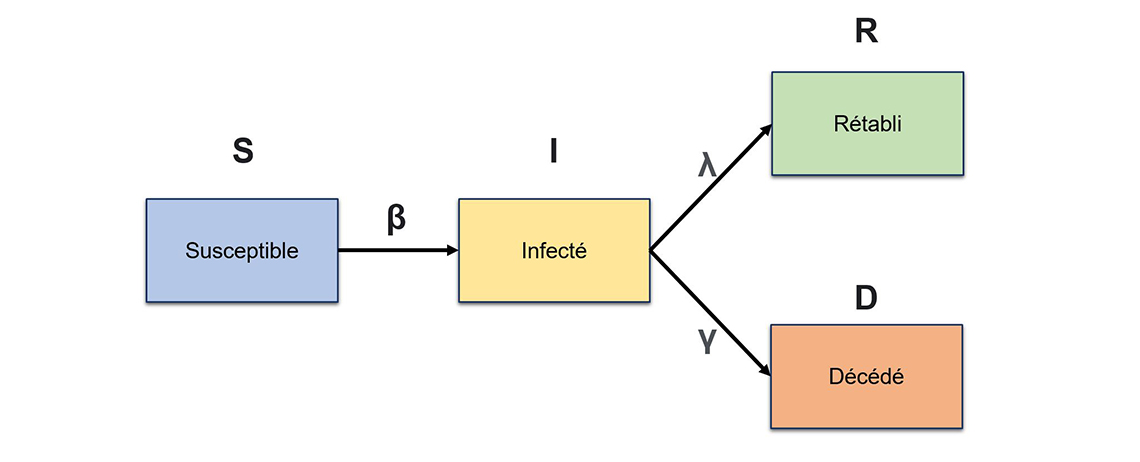


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [4]:
#imports
import matplotlib.pyplot as plt
import pandas
import math
import numpy
from tqdm.contrib.itertools import product

#0 
## La population susceptibles d'être infectées
$ S[i + 1] = (- beta * S[i] * I[i]) * step + S[i] $
## la population infectées
$ [i + 1] = (beta * S[i] * I[i] - gamma * I[i] - mu * I[i]) * step + I[i] $
## la population rétablies
$ R[i + 1] = (gamma * I[i]) * step + R[i] $
## la population décédées
$ D[i + 1] = (mu * I[i]) * step + D[i] $

In [7]:
#1
def euler_forecast(beta, gamma, mu, susceptible, infected, recovered, deceased, time, step, days):
    
    time = [0]
    susceptible = [0.99]  
    infected = [0.01]      
    recovered = [0]      
    deceased = [0]
    
    num_steps = int(days / step)

    for _ in range(1, num_steps):
        new_time = time[-1] + step
        new_susceptible = (- beta * susceptible[-1] * infected[-1]) * step + susceptible[-1]
        new_infected = (beta * susceptible[-1] * infected[-1] - gamma * infected[-1] - mu * infected[-1]) * step + infected[-1]
        new_recovered = (gamma * infected[-1]) * step + recovered[-1]
        new_deceased = (mu * infected[-1]) * step + deceased[-1]

        time.append(new_time)
        susceptible.append(new_susceptible)
        infected.append(new_infected)
        recovered.append(new_recovered)
        deceased.append(new_deceased)

    time = time[::1000]
    susceptible = susceptible[::1000]
    infected = infected[::1000]
    recovered = recovered[::1000]
    deceased = deceased[::1000]

    return time, susceptible, infected, recovered, deceased

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [10]:
#1
# Epidemic parameters
beta = 0.5    # Transmission rate
gamma = 0.15   # Recovery rate
mu = 0.015     # Mortality rate
susceptible = [0.99]  
infected = [0.01]      
recovered = [0]      
deceased = [0]    
time = [0]
step = 0.001  # Time step (days)
days = 100      # Simulation duration (days)

# Run simulation
time, susceptible, infected, recovered, deceased = euler_forecast(beta, gamma, mu, susceptible, infected, recovered, deceased, time, step, days)


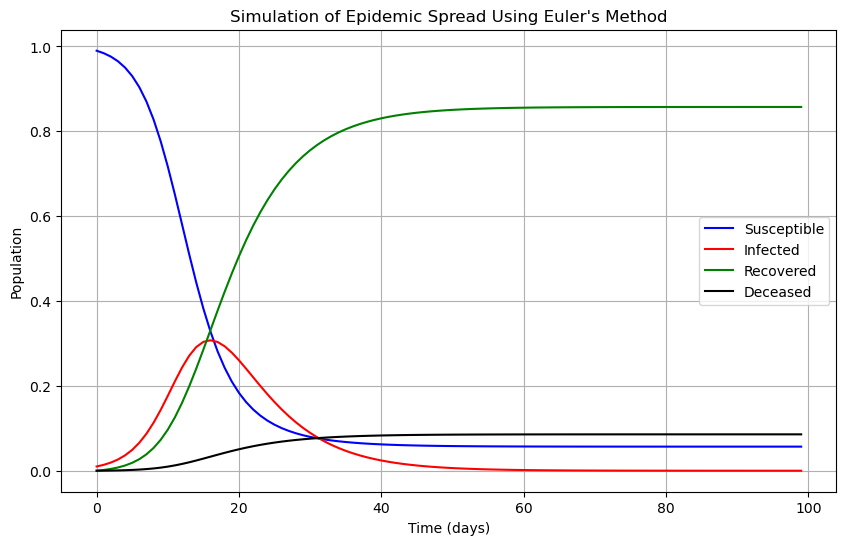

In [12]:
#2
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, susceptible, label="Susceptible", color='blue')
plt.plot(time, infected, label="Infected", color='red')
plt.plot(time, recovered, label="Recovered", color='green')
plt.plot(time, deceased, label="Deceased", color='black')
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.title("Simulation of Epidemic Spread Using Euler's Method")
plt.grid()
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


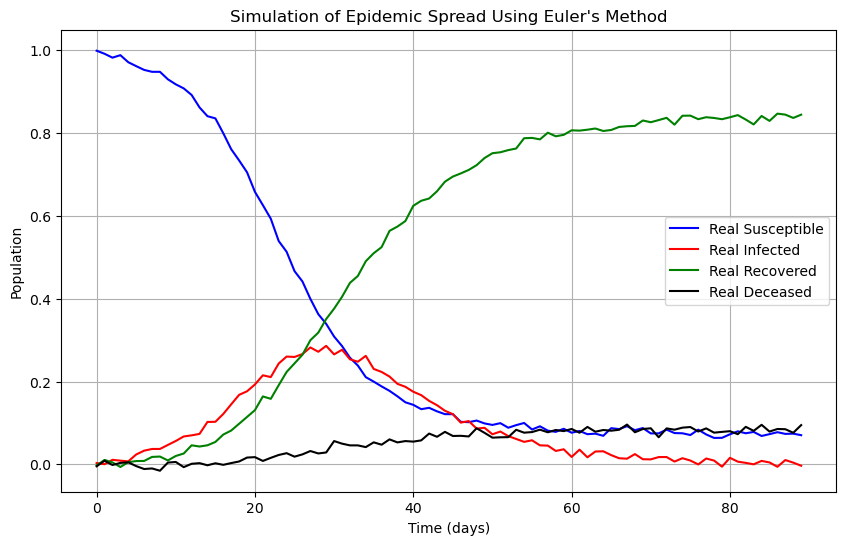

In [15]:
#1
sird_df = pandas.read_csv("sird_dataset.csv")

# Extraction des colonnes
real_susceptible = sird_df["Susceptibles"]  
real_infected = sird_df["Infectés"]      
real_recovered = sird_df["Rétablis"]      
real_deceased = sird_df["Décès"]    

real_days = len(sird_df)  # Nombre de jours réels
time = list(range(real_days))  # Ajustement de time

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(time, real_susceptible, label="Real Susceptible", color='blue')
plt.plot(time, real_infected, label="Real Infected", color='red')
plt.plot(time, real_recovered, label="Real Recovered", color='green')
plt.plot(time, real_deceased, label="Real Deceased", color='black')

plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.legend()
plt.title("Simulation of Epidemic Spread Using Euler's Method")
plt.grid()
plt.show()

In [17]:
#2
def rmse(forcast_model, ground_truth):

    num_steps = min(len(forcast_model), len(ground_truth))

    total_squared_errors = 0
    for index in range(num_steps):
        total_squared_errors += (forcast_model[index] - ground_truth[index]) ** 2

    return math.sqrt(total_squared_errors / num_steps)

In [19]:
error = rmse(susceptible, real_susceptible) + rmse(infected, sird_df["Infectés"]) + rmse(recovered, sird_df["Rétablis"]) + rmse(deceased, sird_df["Décès"])

print("rmse value with beta = 0.5, gamma = 0.15 et mu = 0.015: ", error)

rmse value with beta = 0.5, gamma = 0.15 et mu = 0.015:  0.5133266276479529


In [21]:
def plot_data(time, susceptible, infected, recovered, deceased, ground_truth):

    plt.figure(figsize=(15, 6))
    plt.plot(time, susceptible, label="Susceptible", color='blue')
    plt.plot(time, infected, label="Infected", color='red')
    plt.plot(time, recovered, label="Recovered", color='green')
    plt.plot(time, deceased, label="Deceased", color='black')
    
    plt.plot(time, ground_truth["Susceptibles"], label="Real Susceptible", color='blue')
    plt.plot(time, ground_truth["Infectés"], label="Real Infected", color='red')
    plt.plot(time, ground_truth["Rétablis"], label="Real Recovered", color='green')
    plt.plot(time, ground_truth["Décès"], label="Real Deceased", color='black')
    plt.xlabel("Time (days)")
    plt.ylabel('Population')
    plt.title("Simulation of Epidemic Spread Using Euler's Method")
    plt.legend()
    plt.show()

In [23]:
#3
def grid_search(susceptible, infected, recovered, deceased, ground_truth, step, time, days):
    # Définition des plages des paramètres
    beta_values = numpy.linspace(0.25, 0.5, num=10)
    gamma_values = numpy.linspace(0.08, 0.15, num=10)
    mu_values = numpy.linspace(0.005, 0.015, num=10)

    best_beta, best_gamma, best_mu = None, None, None
    best_rmse = float("inf")

    # Recherche par grille
    for beta, gamma, mu in product(beta_values, gamma_values, mu_values):

        # Prévision avec les paramètres actuels
        time, susceptible, infected, recovered, deceased = euler_forecast(
            beta, gamma, mu, susceptible, infected, recovered, deceased, time, step, days)

        # Calcul du RMSE pour chaque série
        rmse_susceptible = rmse(susceptible, ground_truth["Susceptibles"].values)
        rmse_infected = rmse(infected, ground_truth["Infectés"].values)
        rmse_recovered = rmse(recovered, ground_truth["Rétablis"].values)
        rmse_deceased = rmse(deceased, ground_truth["Décès"].values)

        # RMSE total
        actual_rmse = rmse_susceptible + rmse_infected + rmse_recovered + rmse_deceased

        if actual_rmse < best_rmse:
            best_rmse = actual_rmse
            best_beta, best_gamma, best_mu = beta, gamma, mu
            
            
    print("Best rmse:", best_rmse)

    # Affichage des meilleurs paramètres trouvés
    print("Best parameters:", best_beta, best_gamma, best_mu)

    # Calcul avec les meilleurs paramètres
    time, best_susceptible, best_infected, best_recovered, best_deceased = euler_forecast(
        best_beta, best_gamma, best_mu, susceptible, infected, recovered, deceased, time, step, days)
    
        
    # Tracé des résultats
    plot_data(time, best_susceptible, best_infected, best_recovered, best_deceased, ground_truth)

    return time, best_susceptible, best_infected, best_recovered, best_deceased


In [ ]:
#4
days = len(sird_df)
step = 0.001
time = [0] 

susceptible = [0.99]  
infected = [0.01]      
recovered = [0]      
deceased = [0]

grid_search(susceptible, infected, recovered, deceased, sird_df, step, time, days)

  0%|          | 0/1000 [00:00<?, ?it/s]

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.


1.

**QuanR0 > 1\)  - Cela signifie qu'un individu infecté contamine en moyenne plus d'une personne. L'infection se propage donc rapidement, entraînant u **croissance exponentiee** du nombre de cas. Plus \( R_0 \) est élevé, plus l'épidémie se développe rapidememie.
- **R0 < 1< \) :**
  - Chaque personne infectée contamine en menne **moins d'une psonne**. Cela signifie que l'épémie **s'éteindra progrestement** car le nombre de nouvelles infections diminue au fil du t
aîe.
 R0 = 1R_= 1 \) :**
  - L'infecon res **stable** dans la population : chaque personne infectée en contamine exactement une autre. Il n'y a pas de croissance ni de déclin de l'épidémie. La maladie peut alors persister sans explosion des cas ni dispariti R_0 < 1 \)).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de base
beta_initial = 0.5  # Valeur initiale de beta
gamma = 0.15
mu = 0.015

# Conditions initiales
S0 = 99
I0 = 1
R0 = 0
D0 = 0

# Paramètre de simulation
dt = 0.01  # Pas de temps
T = 160    # Durée de la simulation en jours
n_steps = int(T / dt)

def sird_model(beta, gamma, mu, S0, I0, R0, D0, dt, n_steps):
    S, I, R, D = [S0], [I0], [R0], [D0]
    
    for _ in range(n_steps):
        S_new = S[-1] - beta * S[-1] * I[-1] * dt
        I_new = I[-1] + (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1]) * dt
        R_new = R[-1] + gamma * I[-1] * dt
        D_new = D[-1] + mu * I[-1] * dt

        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
        D.append(D_new)

    return np.array(S), np.array(I), np.array(R), np.array(D)

# Calcul de R0
R_0 = beta_initial / (gamma + mu)

# Scénario 1 : sans intervention
S_no_interv, I_no_interv, R_no_interv, D_no_interv = sird_model(beta_initial, gamma, mu, S0, I0, R0, D0, dt, n_steps)

# Scénario 2 : avec intervention (réduction de beta de 50% après 40 jours)
def sird_model_intervention(beta, gamma, mu, S0, I0, R0, D0, dt, n_steps, intervention_day=40):
    S, I, R, D = [S0], [I0], [R0], [D0]
    
    for step in range(n_steps):
        current_day = step * dt
        # Réduction de beta de 50% après intervention_day
        beta_effective = beta if current_day < intervention_day else beta * 0.5

        S_new = S[-1] - beta_effective * S[-1] * I[-1] * dt
        I_new = I[-1] + (beta_effective * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1]) * dt
        R_new = R[-1] + gamma * I[-1] * dt
        D_new = D[-1] + mu * I[-1] * dt

        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
        D.append(D_new)

    return np.array(S), np.array(I), np.array(R), np.array(D)

S_interv, I_interv, R_interv, D_interv = sird_model_intervention(beta_initial, gamma, mu, S0, I0, R0, D0, dt, n_steps)

# Visualisation
plt.figure(figsize=(14, 8))

time = np.linspace(0, T, n_steps + 1)

# Comparaison des scénarios pour les infectés
plt.plot(time, I_no_interv, label="Infectés - Sans intervention", linestyle='--', color='red', linewidth=2)
plt.plot(time, I_interv, label="Infectés - Avec intervention", linestyle='-', color='blue', linewidth=2)

plt.xlabel("Temps (jours)")
plt.ylabel("% de la population")
plt.title("Impact de l'intervention sur la propagation de l'épidémie")
plt.legend()
plt.grid()
plt.show()

# Explication de R0
print(f"R0 (sans intervention) = {R_0:.2f}")

if R_0 > 1:
    print("Un R0 > 1 signifie que l'épidémie va croître car chaque individu infecté contamine en moyenne plus d'une personne.")
elif R_0 < 1:
    print("Un R0 < 1 signifie que l'épidémie va diminuer car chaque individu infecté contamine en moyenne moins d'une personne.")
else:
    print("Un R0 = 1 signifie que l'épidémie est stable : chaque personne infectée en contamine exactement une autre.")